In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.animation
from dla_as import dla_as
from dla import dla
from fractal_dimension import analyse
from PIL import Image


%matplotlib notebook
%reload_ext autoreload
%autoreload 2

In [4]:
n_iters = 10000
n_walkers = 10000
x = 1000
y = 1000
point = (999, 999)

In [5]:
bot = np.zeros((x, y))
bot[-1] = 1

center = np.zeros((x, y))
center[x//2, y//2] = 1

In [6]:
scene, particles, dimensions = dla(
    init_grid=center,
    n_iters=n_iters,
    n_walkers=n_walkers,
    n_iters_per_frame=1000
)

100%|██████████████████████████████████████| 9999/9999 [00:10<00:00, 921.93it/s]


In [9]:
scene.shape

(10, 1000, 1000)

<IPython.core.display.Javascript object>


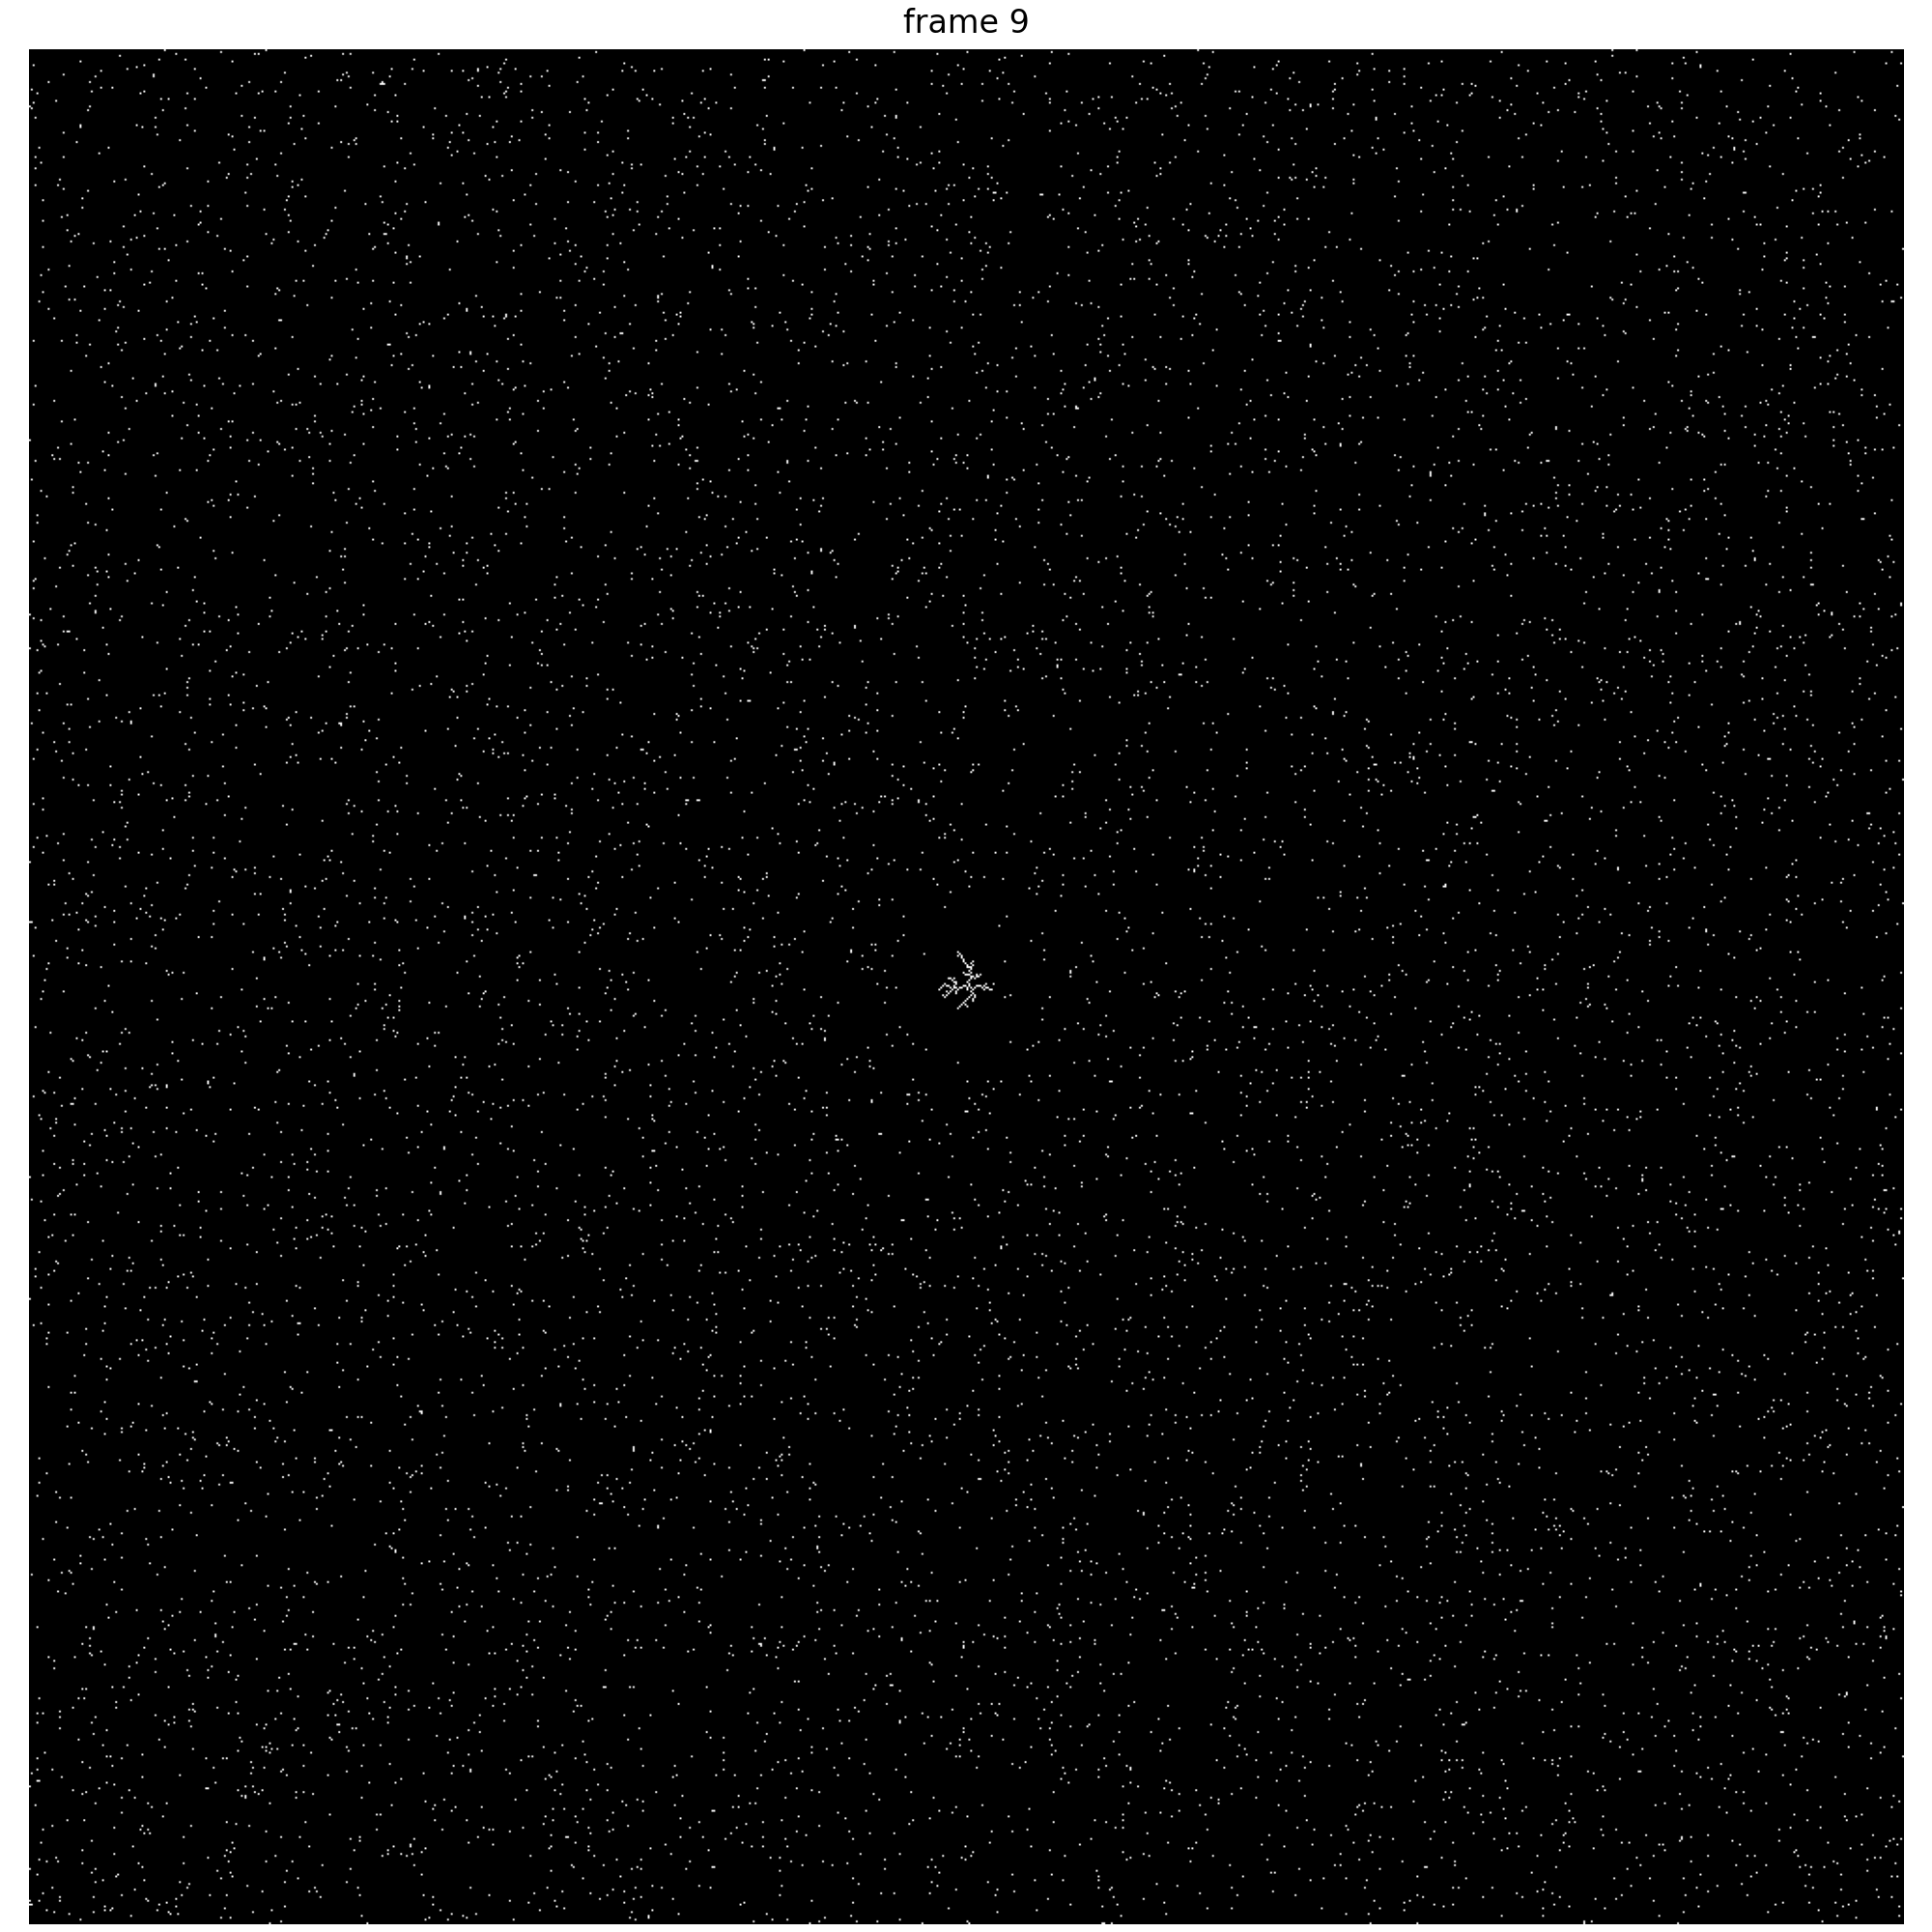

In [12]:
matplotlib.rcParams['animation.embed_limit'] = 2**128


fig, ax = plt.subplots(figsize=(10, 10), constrained_layout=True)
img = ax.imshow(X=scene[0] + particles[0], cmap='gray')
title = ax.set_title('frame 0')
ax.set_axis_off()

def fig_update(frame: int):
    img.set_data(scene[frame] + particles[frame])
    title.set_text(f'frame {frame}')

ani = matplotlib.animation.FuncAnimation(
    fig=fig,
    func=fig_update,
    frames=10,
    interval=50
)
video = ani.to_html5_video()

In [14]:
ani.save('./test_animation.gif', writer='imagemagick', fps=60)